## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

Corresponding with this notebook is a slide deck where you will need to update all the portions in red.  Completing the notebook will provide all the results needed for the slides.  **Correctly completing the slides is a required part of the project.**

## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Probability](#probability)
- [Part III - Experimentation](#experimentation)
- [Part IV - Algorithms](#algorithms)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='descriptive'></a>
#### Part I - Descriptive Statistics

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(0)

For each of the parts of question `1` notice links to [pandas documentation](https://pandas.pydata.org/) is provided to assist with answering the questions.  Though there are other ways you could solve the questions, the documentation is provided to assist you with one fast way to find the answer to each question.


`1.a)` Now, read in the `ab_data.csv` data. Store it in `df`. Read in the dataset and take a look at the top few rows here. **This question is completed for you**:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,country,group,converted
0,UK,control,0
1,US,treatment,1
2,UK,treatment,0
3,UK,control,0
4,UK,treatment,0


`b)` Use the below cell to find the number of rows in the dataset. [Helpful  Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape)

In [3]:
print(f"Number of rows: {df.shape[0]}")

Number of rows: 69889


`c)` The proportion of users converted.  [Helpful  Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)

In [4]:
df['converted'].mean().round(5)

0.13048

`d)` Do any of the rows have missing values? [Helpful Pandas Link One](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) and [Helpful Pandas Link Two](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

In [5]:
df.isnull().value_counts()

country  group  converted
False    False  False        69889
dtype: int64

Inidicates that there are no missing values as all have the value `False` as a response to the `isnull()` function

`e)` How many customers are from each country? Build a bar chart to show the count of visits from each country.

In [6]:
df['group'].value_counts()

treatment    35211
control      34678
Name: group, dtype: int64

In [7]:
# number of visitors from each country - pull the necessary code from the next cell to provide just the counts
df.groupby('country')['group'].count()

country
CA     3488
UK    17551
US    48850
Name: group, dtype: int64

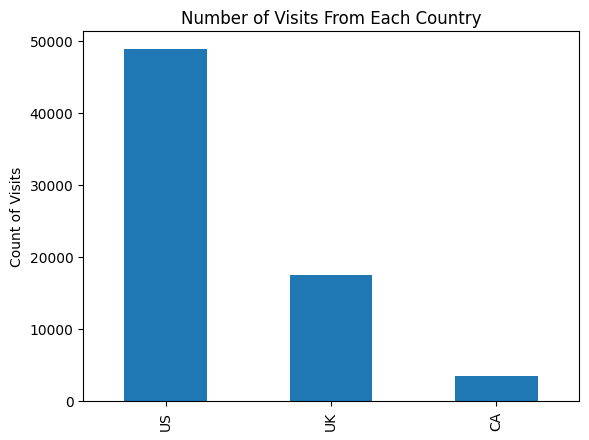

In [8]:
# bar chart of results - this part is done for you
df['country'].value_counts().plot(kind='bar');
plt.title('Number of Visits From Each Country');
plt.ylabel('Count of Visits');
plt.show();

`f)` Recognize that all of your columns are of a **categorical data type** with the exception of one.  Which column is not **categorical**? [Helpful Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)

The converted column is not categorical.

`g)` What are the possible values of the `converted` column?  Does it make sense that these values are the only possible values? Why or why not? 

**Here you can use one of the functions you used in an earlier question**.

Yes it does make sense that there are only two possible values as they represent Yes/No options for the question of: Did the person convert? </br> 
1 <-- Converted (Yes) </br>
0 <-- Didn't Convert (No)

In [9]:
df['converted'].value_counts()

0    60770
1     9119
Name: converted, dtype: int64

<a id='probability'></a>
#### Part II - Probability

`1.` Now that you have had a chance to learn more about the dataset, let's look more at how different factors are related to `converting`.

`a)` What is the probability of an individual converting regardless of the page they receive or the country they are from? Simply, what is the chance of conversion in the dataset?

In [10]:
df.describe()

,converted
count,69889.000000
mean,0.130478
std,0.336831
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


13% convert

`b)` Given that an individual was in the `control` group, what is the probability they converted? **This question is completed for you**

In [11]:
df.query('group == "control"')['converted'].mean()

0.1052540515600669

`c)` Given that an individual was in the `treatment` group, what is the probability they converted?

In [12]:
df.query('group == "treatment"')['converted'].mean()

0.15532078043793132

`d)` Do you see evidence that the treatment is related to higher `converted` rates?

Yes, I do. As 10% of the control group convert while 15% of treatment group convert so it is evidence that the treatment group is associated with higher conversion rates.

`e)` What is the probability that an individual was in the `treatment`?

In [13]:
(df['group'] == 'treatment').mean()

0.5038131894861853

`f)` What is the probability that an individual was from Canada `CA`?

In [14]:
(df['country'] == "CA").mean()

0.04990771079855199

`g)` Given that an individual was in the `US`, what was the probability that they `converted`? **This question is completed for you**

$P(\text{converted} == 1|\text{country} ==\text{"US"})$



In [15]:
df.query('country == "US"')['converted'].mean()

0.13277379733879222

`h)` Given that an individual was in the `UK`, what was the probability that they `converted`? 

$P(\text{converted} == 1|\text{country} ==\text{"UK"})$

In [16]:
df.query('country == "UK"')['converted'].mean()

0.12512107572218106

`i)` Do you see evidence that the `converted` rate might differ from one country to the next?

It seems like the US has the highest conversion rate, but the changes aren't very noticeable (only 0.7%). So, yes there is a change but it's not major and not statistically significant

`j)` Consider the table below, fill in the conversion rates below to look at how conversion by country and treatment group vary.  The `US` column is done for you, and two methods for calculating the probabilities are shown - **COMPLETE THE REST OF THE TABLE**.  Does it appear that there could be an interaction between how country and treatment impact conversion?

These two values that are filled in can be written as:

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"control"})) = 10.7\%$

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"treatment"})) = 15.8\%$

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  %          |  %          |
| Treatment   | 15.8%       |  %          |  %          |

In [17]:
# Method 1  - explicitly calculate each probability
print(df.query('country == "US" and group == "control" and converted == 1').shape[0]/df.query('country == "US" and group == "control"').shape[0]) 
print(df.query('country == "US" and group == "treatment" and converted == 1').shape[0]/df.query('country == "US" and group == "treatment"').shape[0])

0.10731404958677686
0.1577687626774848


In [18]:
# Method 2 - quickly calculate using `groupby`
df.query('country == "US"').groupby('group')['converted'].mean()

group
control      0.107314
treatment    0.157769
Name: converted, dtype: float64

##### Solution -- Complete the Table Here

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  10.1%      |  9.4%       |
| Treatment   | 15.8%       |  14.8%      |  15.4%      |

In [19]:
df.query('country == "CA"').groupby('group')['converted'].mean()

group
control      0.094474
treatment    0.154017
Name: converted, dtype: float64

In [ ]:
df.query('country == "UK"').groupby('group')['converted'].mean()

group
control      0.101649
treatment    0.148698
Name: converted, dtype: float64

<a id='experimentation'></a>
### Part III - Experimentation

`1.` Consider you need to make the decision just based on all the data provided.  If you want to assume that the control page is better unless the treatment page proves to be definitely better at a Type I error rate of 5%, you state your null and alternative hypotheses in terms of **$p_{control}$** and **$p_{treatment}$** as:  

$H_{0}: p_{control} >= p_{treatment}$

$H_{1}: p_{control} < p_{treatment}$

Which is equivalent to:

$H_{0}: p_{treatment} - p_{control} <= 0$

$H_{1}: p_{treatment} - p_{control} > 0$


Where  
* **$p_{control}$** is the `converted` rate for the control page
* **$p_{treatment}$** `converted` rate for the treatment page

**Note for this experiment we are not looking at differences associated with country.**

Assume under the null hypothesis, $p_{treatment}$ and $p_{control}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{treatment}$ and $p_{control}$ are equal. Furthermore, assume they are equal to the **converted** rate in `df` regardless of the page. **These are set in the first cell below.**<br><br>

* Use a sample size for each page equal to the ones in `df`. **These are also set below.**  <br><br>

* Perform the sampling distribution for the difference in `converted` between the two pages over 500 iterations of calculating an estimate from the null.  <br><br>

* Use the cells below to provide the necessary parts of this simulation.  

If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 4** in the classroom to make sure you are on the right track.<br><br>

`a)` The **convert rate** for $p_{treatment}$ under the null.  The **convert rate** for $p_{control}$ under the null. The sample size for the `control` and the sample size for the `treatment` are from the original dataset. **All of these values are set below, and set the stage for the simulations you will run for the rest of this section.**

In [21]:
p_control_treatment_null  = df['converted'].mean()
n_treatment = df.query('group == "treatment"').shape[0]
n_control = df.query('group == "control"').shape[0]

In [22]:
print(p_control_treatment_null, n_treatment, n_control)

0.13047832992316388 35211 34678


`b)` Use the results from part `a)` to simulate `n_treatment` transactions with a convert rate of `p_treatment_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **treatment_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be the same): 

`[0, 0, 1, 1, 0, ....]` 

In [23]:
p_treatment_null  = df.query("group == 'treatment'")['converted'].mean()
treatment_converted = np.random.binomial(1, p_treatment_null, n_treatment)

`c)` Use the results from part `a)` to simulate `n_control` transactions with a convert rate of `p_control_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **control_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be exactly the same): 

`[0, 0, 1, 1, 0, ....]` 

In [24]:
p_control_null = df.query("group == 'control'")['converted'].mean()
control_converted =  np.random.binomial(1, p_control_null, n_control)

`d)` Find the estimate for $p_{treatment}$ - $p_{control}$ under the null using the simulated values from part `(b)` and `(c)`.

In [25]:
print(treatment_converted.mean(), control_converted.mean())

0.15864360569140326 0.10597496972143722


In [26]:
treatment_converted.mean() - control_converted.mean()

0.05266863596996604

`e)` Simulate 500 $p_{treatment}$ - $p_{control}$ values using this same process as `b)`- `d)` similarly to the one you calculated in parts **a. through g.** above.  Store all 500 values in an numpy array called **p_diffs**.  This array should look similar to the below **(the values will not match AND this will likely take a bit of time to run)**:

`[0.001, -0.003, 0.002, ...]`

In [27]:
p_diffs = []
for _ in range(500):
    # simulate the treatment and control converted arrays
    treatment_converted = np.random.binomial(1, p_control_treatment_null, n_treatment)
    control_converted =  np.random.binomial(1, p_control_treatment_null, n_control)
    # calculate p_treatment and p_control under the null
    p_treatment = treatment_converted.mean()
    p_control = control_converted.mean()
    # calculate the difference between p_treatment_null and p_control_null
    p_diff = p_control - p_treatment
    # add p_diff to the p_diffs array
    p_diffs.append(p_diff)
    

`f)` Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

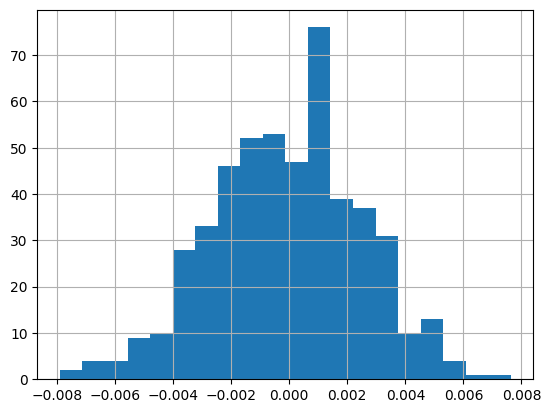

In [28]:
p_diffs = pd.Series(p_diffs);
p_diffs.hist(bins=20);

`g)` What proportion of the **p_diffs** are greater than the difference observed between `treatment` and `control` in `df`?

In [29]:
control_group = df[df['group'] == 'control']
treatment_group = df[df['group'] == 'treatment']
observed_control_conversion = control_group['converted'].mean()
observed_treatment_conversion = treatment_group['converted'].mean()
observed_difference = observed_treatment_conversion - observed_control_conversion

proportion_greater = np.sum(p_diffs > observed_difference) / len(p_diffs)
proportion_greater

0.0

`h)` In words, explain what you just computed in part `g)`  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages using our Type I error rate of 0.05?

I just computed the probability of observing a difference between treatment and control groups compared to the ones observed assuming that the null hypothesis is true

This value is named the 'p-value'. It shows that the amount that through out there is a statistically significant difference between the new and old pages showing a more positive result to the new page and that we should use the new pages as there's sufficient evidence to reject the null hypothesis (which is that either the old page is better or they're equally good) 

<a id='algorithms'></a>
### Part IV - Algorithms

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.  All the code needed for the modeling and results of the modeling for sections `b) - f)` have been completed for you. 

**You will need to complete sections `a)` and `g)`.**  

**Then use the code from `1.` to assist with the question `2.`   You should be able to modify the code to assist in answering each of question 2's parts.**<br><br>

`a)` Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression, since the outcome is binary logistic regression is the most suitable as it estimates the probabilty that a given input results in a conversion. 

The goal is to use **statsmodels** to fit the regression model you specified in part `a)` to see if there is a significant difference in conversion based on which page a customer receives.  

`b)` However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

It may be helpful to look at the [get_dummies documentation](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) to encode the `ab_page` column.

Below you can see an example of the new columns that will need to be added (The order of columns is not important.): **This question is completed for you**

##### Example DataFrame
| intercept   | group       | ab_page     | converted   |
| ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  1          |

In [30]:
df['intercept'] = 1
df['ab_page'] = pd.get_dummies(df['group'])['treatment']
df.head()

,country,group,converted,intercept,ab_page
0,UK,control,0,1,0
1,US,treatment,1,1,1
2,UK,treatment,0,1,1
3,UK,control,0,1,0
4,UK,treatment,0,1,1


`c)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is a difference in `treatment` vs. `control`. **This question is completed for you**

In [31]:
X = df[['intercept', 'ab_page']]
y = df['converted']

`d)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `c)`. 

You can find the [statsmodels documentation to assist with this exercise here](https://www.statsmodels.org/stable/discretemod.html).  **This question is completed for you**

In [32]:
import statsmodels.api as sm

# Logit Model
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.384516
         Iterations 6


`e)` Provide the summary of your model below. **This question is completed for you**

In [33]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69887
Method:                           MLE   Df Model:                            1
Date:                Wed, 28 May 2025   Pseudo R-squ.:                0.007175
Time:                        10:39:28   Log-Likelihood:                -26873.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.810e-86
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1402      0.017   -122.305      0.000      -2.174      -2.106
ab_page        0.4467      0.023     19.539      0.000       0.402       0.492


`f)` What is the p-value associated with **ab_page**? Does it lead you to the same conclusion you drew in the **Experiment** section.

p-value of 0.0 means that it is statistically significant showing sufficient evidence to reject the null hypothesis. the null hypothesis is that type (ab_page) has no effect on conversion the control page is more successful. Yes it is the same conclusion as the Experiment Section both show that the p-value is 0.0 and that the treatment page is more successful than the control in contrast to the null hypothesis.

`2. a)` Now you will want to create two new columns as dummy variables for `US` and `UK`.  Again, use `get_dummies` to add these columns.  The dataframe you create should include at least the following columns (If both columns for `US` and `UK` are `0` this represents `CA`.  The order of rows and columns is not important for you to match - it is just to illustrate how columns should connect to one another.):

##### Example DataFrame
| intercept   | group       | ab_page     | converted   | country     |  US         | UK          |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  0          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  1          |  CA         |  0          |  0          |
| 1           |  treatment  |  1          |  1          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  1          |  US         |  1          |  0          |

In [34]:
### Create the necessary dummy variables
df[['CA', 'UK', 'US']] = pd.get_dummies(df['country'])


`b)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is 
* a difference in `converted` between `treatment` vs. `control`
* a difference in `converted` between `US`, `UK`, and `CA`

In [35]:
X = df['converted']  
y = df[['intercept', 'US', 'UK', 'ab_page']]

`c)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `b)`. 
You can find the [statsmodels documentation to assist with this exercise here](https://www.statsmodels.org/stable/discretemod.html).

In [36]:
X = X.astype(int)
y = y.astype(int)
model = sm.Logit(X, y)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.384463
         Iterations 6


`d)` Provide the summary of your model below.

In [37]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69885
Method:                           MLE   Df Model:                            3
Date:                Wed, 28 May 2025   Pseudo R-squ.:                0.007312
Time:                        10:39:34   Log-Likelihood:                -26870.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.778e-85
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1930      0.053    -41.308      0.000      -2.297      -2.089
US             0.0727      0.053      1.372      0.170      -0.031       0.177
UK             0.0067      0.056      0.120      0.905      -0.103       0.117
ab_page        0.4466      0.023     19.534      0.000       0.402       0.491
==============================================================================
"""

`e)` What do the `p-values` associated with `US` and `UK` suggest in relation to how they impact `converted`? 

The p-values associated with US and UK are not statistically significance therefore there is not enough evidence to reject the null hypothesis, so they don't strongly impact the converted variable. But we can say from a practical standpoint that the US is relatively more successful than the UK and will be wiser to expand to it more and will be met with relatively higher success.